In [1]:
cd C:\Users\narkh\Downloads\Datasets

C:\Users\narkh\Downloads\Datasets


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from statistics import mean,median

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score

In [3]:
data = pd.read_csv("bank-full.csv")

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


- Dataset is loaded Successfully

# Exploratory Data Analysis (EDA)

In [5]:
data.shape

(45211, 17)

In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

- Dataset doesn't contain any NULL values

In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

- 10 features are of Object Type, 7 are numbers type
- As per given data we know that 10 features are of categorical, so lets convert them as category type 

In [8]:
data[['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome', 'Target']] = data[['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome', 'Target']].apply(pd.Categorical)

In [13]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [14]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [15]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [16]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [17]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

Five Point Summary

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Outliers present in age, balance, duration, campaign, pdays, previous


Distribution of numerical columns 

C:\Users\narkh\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


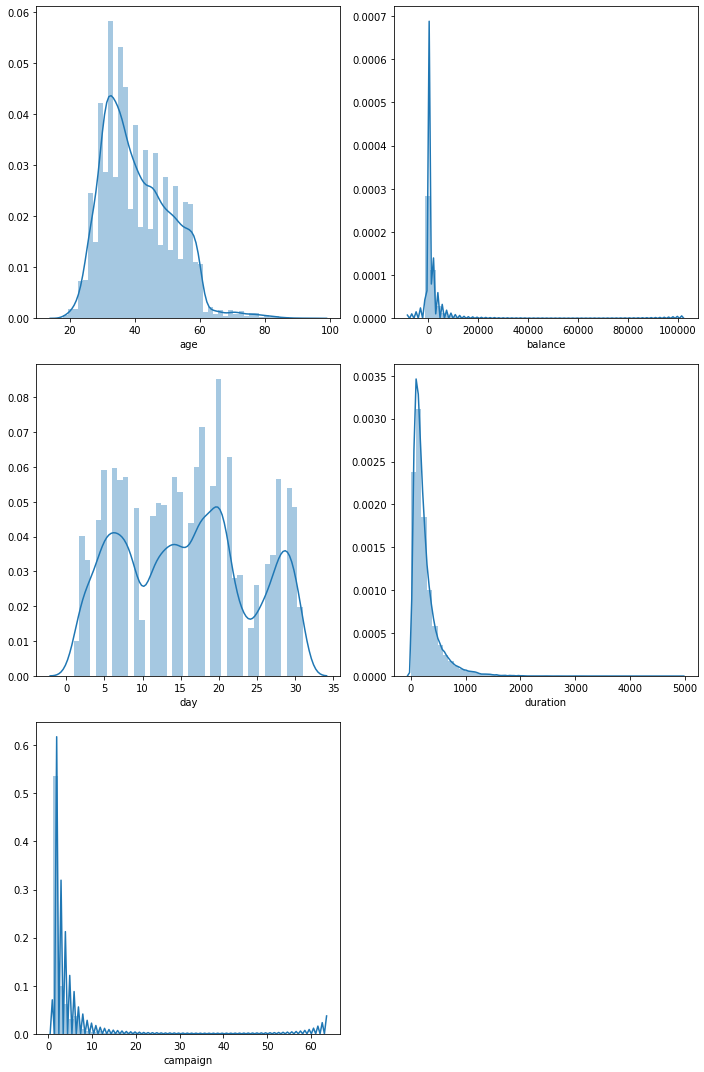

In [27]:
fig , axe = plt.subplots(nrows=3,ncols=2,figsize=(10,15))
#sns.kdeplot(data, cumulative=True, bw=1.5)
axe = axe.flatten()
sns.distplot(data['age'], ax=axe[0])
sns.distplot(data['balance'], ax=axe[1])
sns.distplot(data['day'], ax=axe[2])
sns.distplot(data['duration'], ax=axe[3])
sns.distplot(data['campaign'], ax=axe[4])
#sns.distplot(data['pdays'], ax=axe[5])
#sns.distplot(data['previous'], ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

IndexError: index 8 is out of bounds for axis 0 with size 8

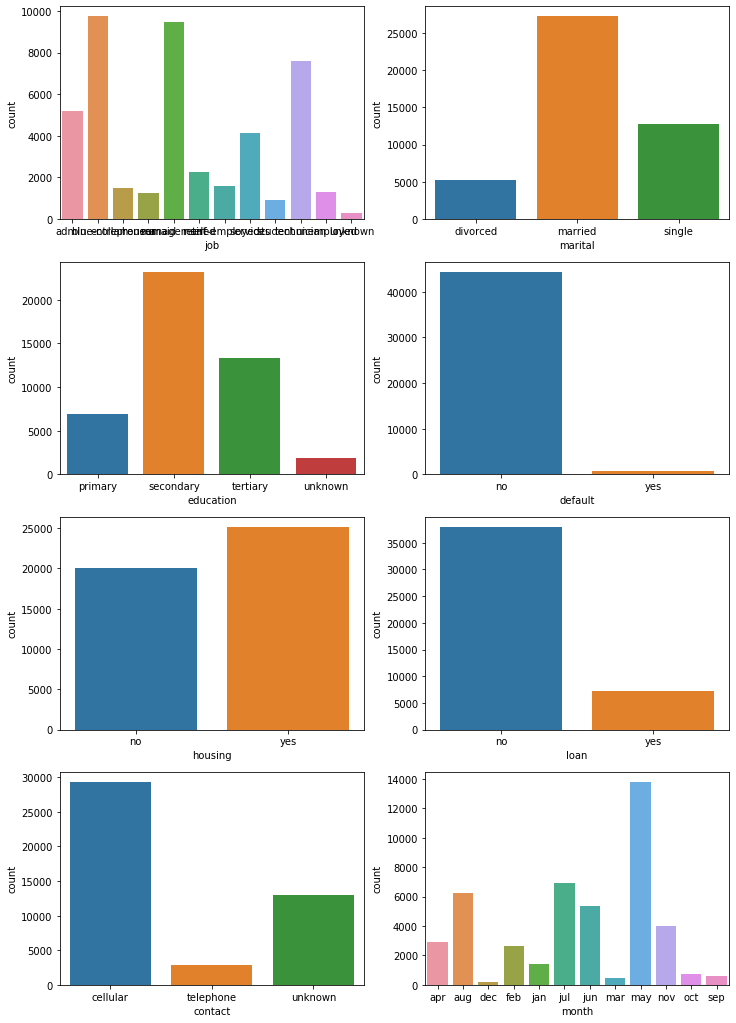

In [35]:
fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(12,18))
axe = axe.flatten()
plot=sns.countplot(x=data['job'],data=data,ax = axe[0])
#plt.setp(plt.get_Xticklabels(),rotation=90)

sns.countplot(x=data['marital'],data=data,ax=axe[1])
sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])

fig.tight_layout()
fig.show()

## Understanding from distributions
- More than 90% customers have no default credit
- Around 88% customers have not subscribed for term deposit
- Most customers have been contacted in may
- Most customers have been contacted by cellular network(mobile phone)
- Number of customers who have housing loan is more than the number of customers who don't have housing loan
- Around 6% customers have credit in default

# Measure of skewness of numerical columns

In [37]:
data.skew().to_frame('Skewness').T

,age,balance,day,duration,campaign,pdays,previous
Skewness,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


# Checking the presence of outliers

C:\Users\narkh\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


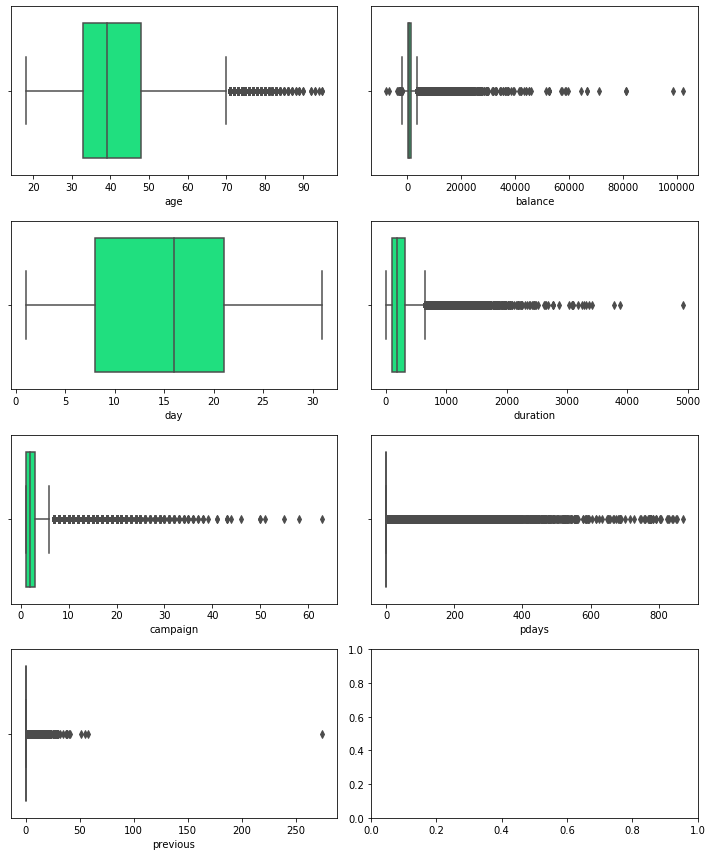

In [38]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=data,color='springgreen',ax=axe[0])
sns.boxplot(x='balance',data=data,color='springgreen',ax=axe[1])
sns.boxplot(x='day',data=data,color='springgreen',ax=axe[2])
sns.boxplot(x='duration',data=data,color='springgreen',ax=axe[3])
sns.boxplot(x='campaign',data=data,color='springgreen',ax=axe[4])
sns.boxplot(x='pdays',data=data,color='springgreen',ax=axe[5])
sns.boxplot(x='previous',data=data,color='springgreen',ax=axe[6])
fig.tight_layout()
fig.show()

### Understanding from boxplots
- Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
- Values less than 0 are present in 'Balance' column

#  Distribution of Target Column

In [39]:
data['Target'].value_counts().to_frame('Target column distriution')

,Target column distriution
no,39922
yes,5289


- From above values it can be stated that the dataset is imbalanced.

# Data Preprocessing

## Label Encoding of variables

In [40]:
df_2 = data.copy()
encoder = LabelEncoder()
df_2['default'] = encoder.fit_transform(df_2['default']).astype(int) 
df_2['marital'] = encoder.fit_transform(df_2['marital']).astype(int)
df_2['loan'] = encoder.fit_transform(df_2['loan']).astype(int)
df_2['housing'] = encoder.fit_transform(df_2['housing']).astype(int)
df_2['Target'] = encoder.fit_transform(df_2['Target']).astype(int)
df_2['month'] = encoder.fit_transform(df_2['month']).astype(int)
df_2['poutcome'] = encoder.fit_transform(df_2['poutcome']).astype(int)
df_2['education'] = encoder.fit_transform(df_2['education']).astype(int)
df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


# Checking & modifying datatypes after Label Encoding

In [41]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [42]:

df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [43]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# Handeling Outliers with mean replacement

C:\Users\narkh\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Boxplots after handeling outliers


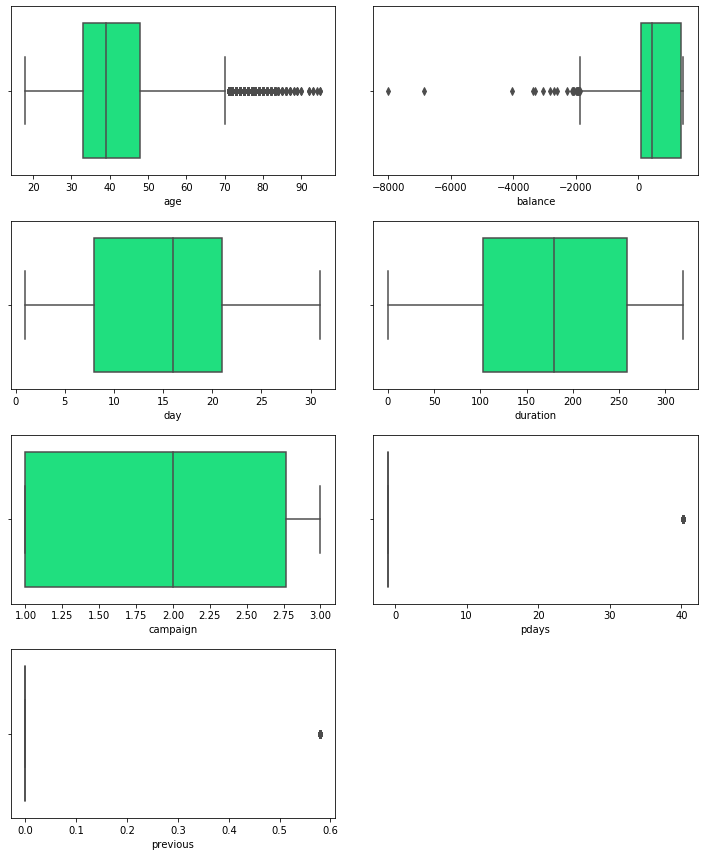

In [45]:
meanbal = float(df_2['balance'].mean())
df_2['balance'] = np.where(df_2['balance'] >np.percentile(df_2['balance'], 75), meanbal,df_2['balance'])

meandur = float(df_2['duration'].mean())
df_2['duration'] = np.where(df_2['duration'] >np.percentile(df_2['duration'], 75), meandur,df_2['duration'])

meancam = float(df_2['campaign'].mean())
df_2['campaign'] = np.where(df_2['campaign'] >np.percentile(df_2['campaign'], 75), meancam,df_2['campaign'])

meanpd = float(df_2['pdays'].mean())
df_2['pdays'] = np.where(df_2['pdays'] >np.percentile(df_2['pdays'], 75), meanpd,df_2['pdays'])

meanpr = float(df_2['previous'].mean())
df_2['previous'] = np.where(df_2['previous'] >np.percentile(df_2['previous'], 75),meanpr ,df_2['previous'])


fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=df_2,color='springgreen',ax=axe[0])
sns.boxplot(x='balance',data=df_2,color='springgreen',ax=axe[1])
sns.boxplot(x='day',data=df_2,color='springgreen',ax=axe[2])
sns.boxplot(x='duration',data=df_2,color='springgreen',ax=axe[3])
sns.boxplot(x='campaign',data=df_2,color='springgreen',ax=axe[4])
sns.boxplot(x='pdays',data=df_2,color='springgreen',ax=axe[5])
sns.boxplot(x='previous',data=df_2,color='springgreen',ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handeling outliers')


## Understanding from boxplots after handeling outliers
- Outliers in 'age' column are not handled because it is a specific value for each record.
- After handeling Outliers in 'balance', the number of outliers on the lower side is increased.

# Correlation plot of all features

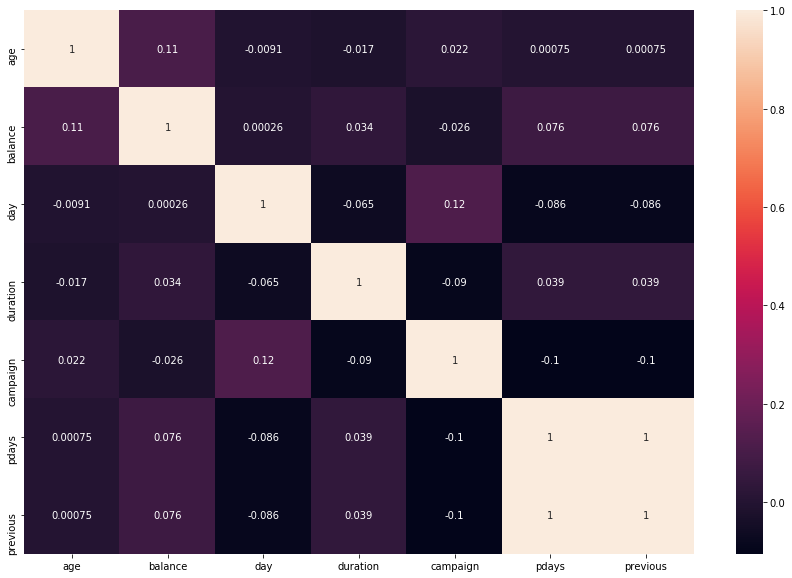

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(df_2.corr(),annot=True)

## Understanding from above corrp plot:
- 'pdays' and 'previous' are highly correlated


## Removing columns:
- 'job','education' and 'contact' attributes contain multiple unknown values.
- As they are specific string values and not numerical so cannot be treated with median, mean replacement
- As per data description, duration attribute is removed to have a realistic prediction.
- 'day' and 'month' of contact will not have any realtionship with customer opting for subscription
- 'pdays' and 'previous' are highly correlated so removing any one from both of them.
- Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous         marketing campaign. Which can help in better training and testing of models.

In [47]:
df_2 = df_2.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df_2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of features

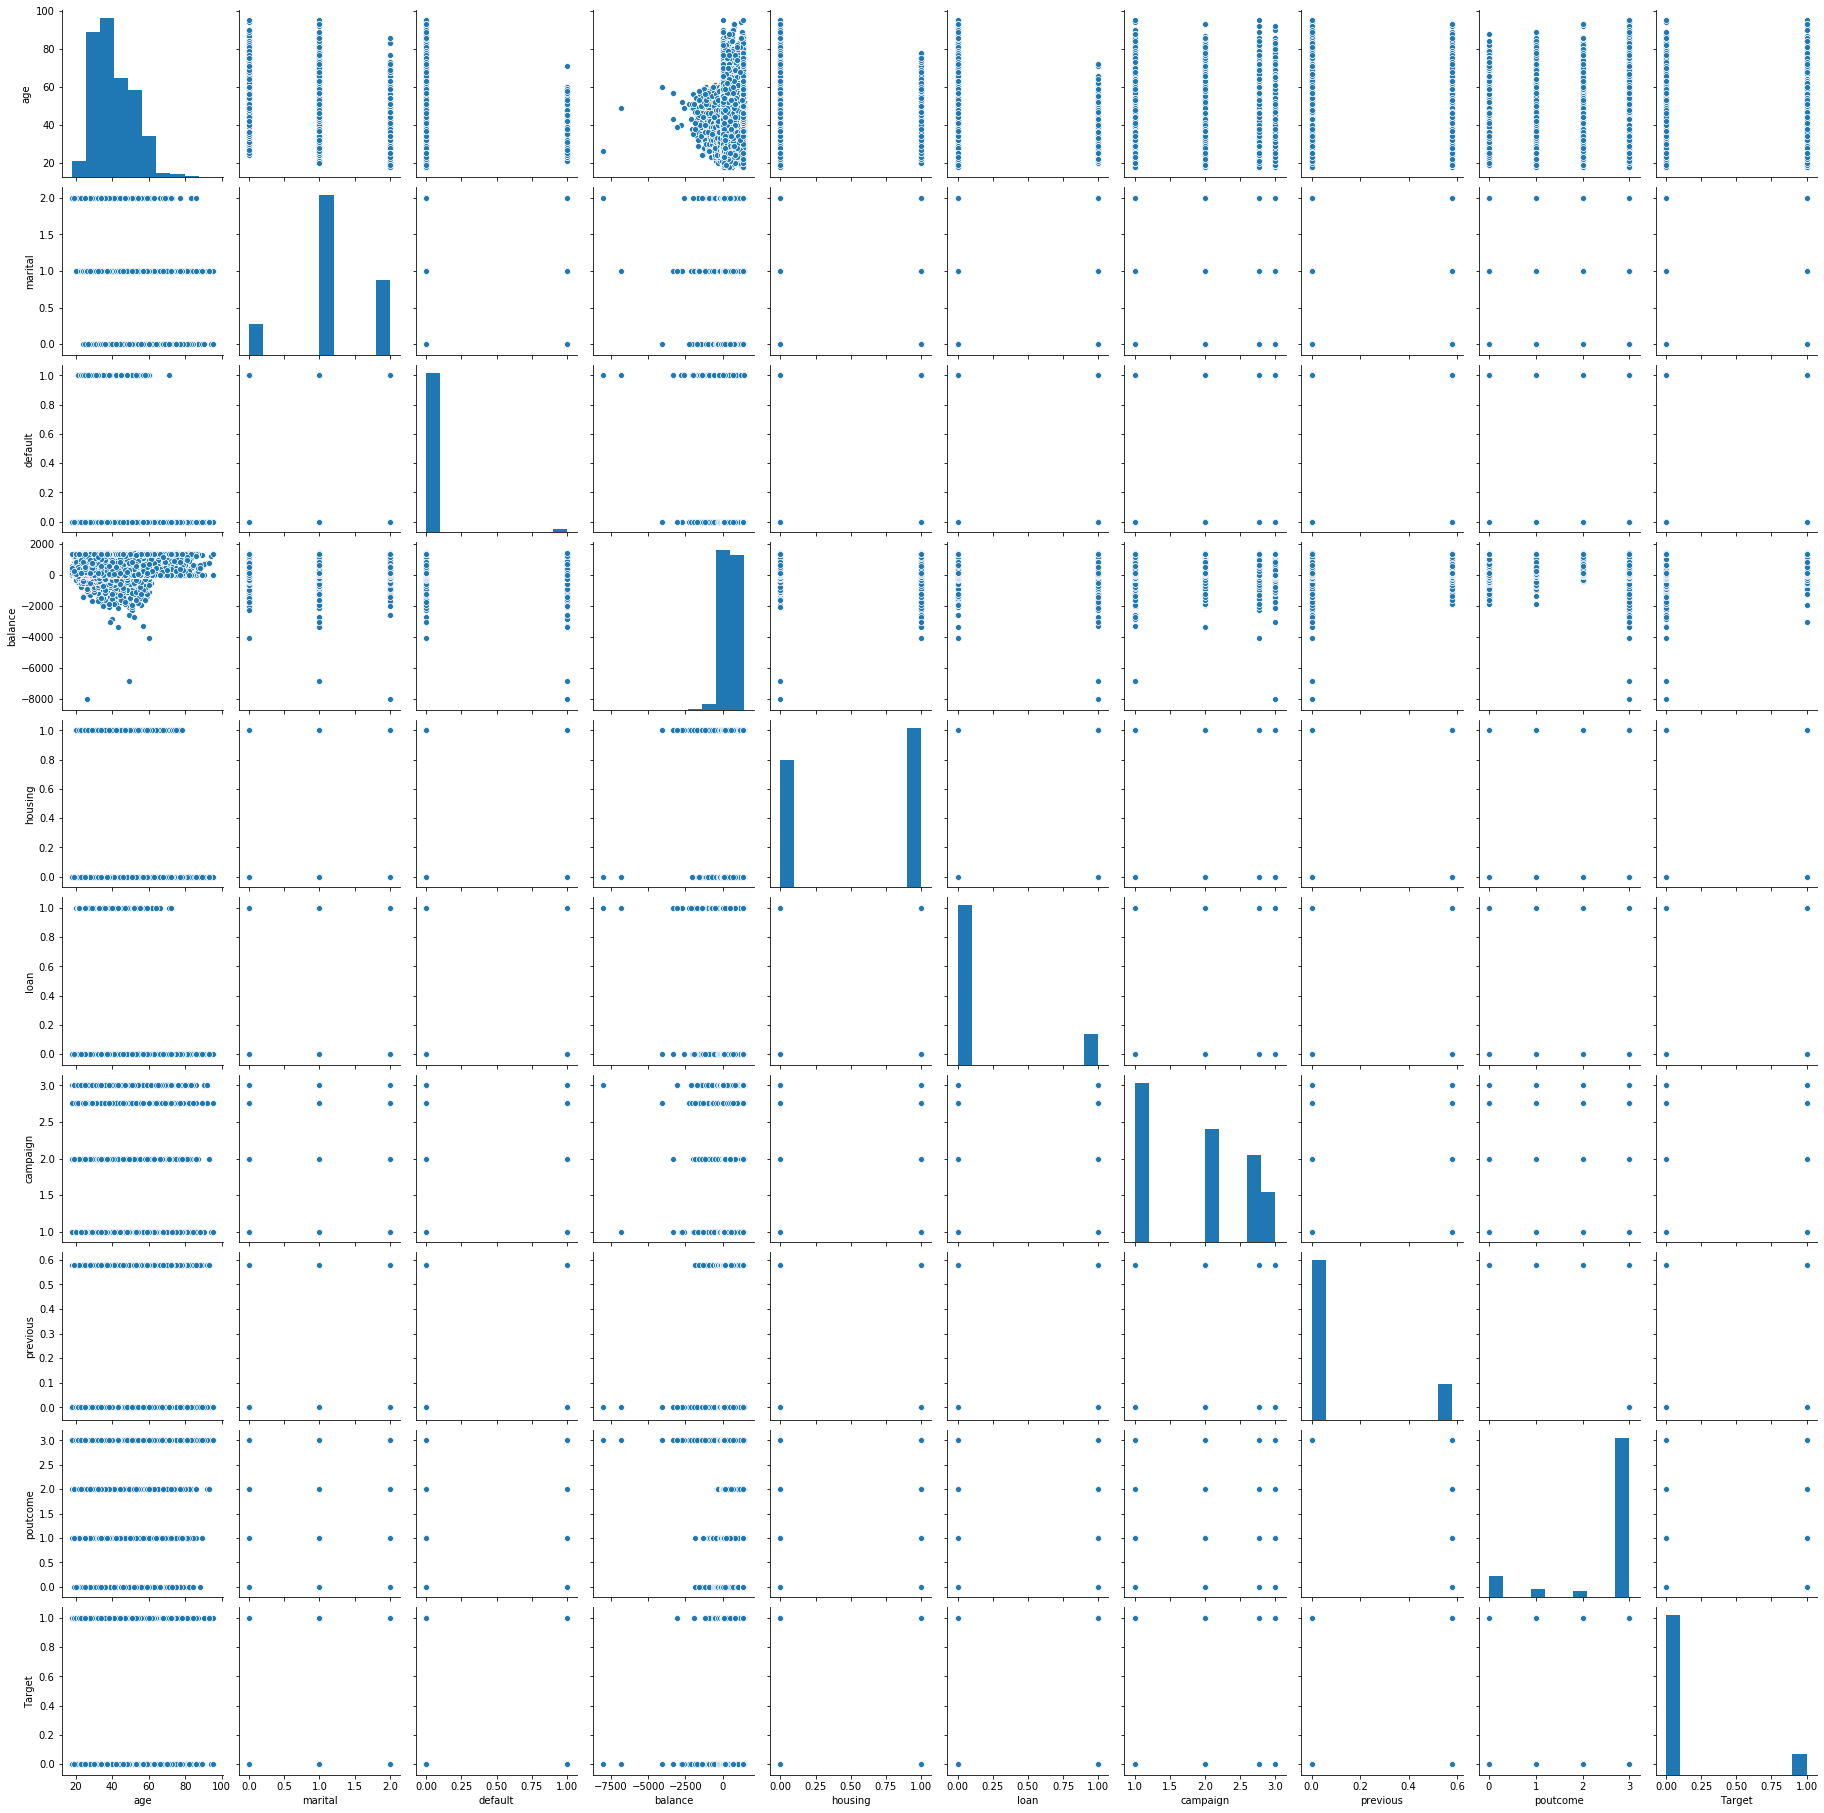

In [48]:
sns.pairplot(df_2)

# Train Test Split 

In [49]:
X = df_2.drop('Target',axis=1)  
y = df_2['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

# Scaling of columns

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Models

## Logistic Regression

In [69]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
ypred = log_reg.predict(X_test_scaled)

In [70]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,ypred))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,ypred))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,ypred))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[11897   116]
 [ 1310   241]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.68      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

-------------------------------------------------------
3. Accuracy Score
 0.8948687702742554
-------------------------------------------------------


## Naive Bayes

In [68]:
NB = GaussianNB()
NB.fit(X_train_scaled,y_train)
ypred1 = NB.predict(X_test_scaled)

In [71]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,ypred1))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,ypred1))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,ypred1))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

-------------------------------------------------------
3. Accuracy Score
 0.8294750810970215
-------------------------------------------------------


## K Nearest  Neighbour

In [72]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
ypred2 = knn.predict(X_test_scaled)

In [73]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,ypred2))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,ypred2))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,ypred2))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[11689   324]
 [ 1257   294]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     12013
           1       0.48      0.19      0.27      1551

    accuracy                           0.88     13564
   macro avg       0.69      0.58      0.60     13564
weighted avg       0.85      0.88      0.86     13564

-------------------------------------------------------
3. Accuracy Score
 0.88344146269537
-------------------------------------------------------


optimal k is 13


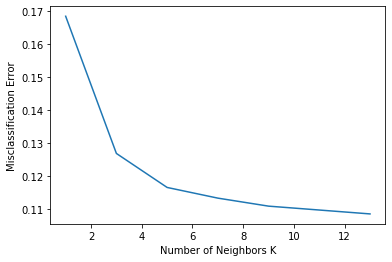

In [74]:
oddList = list(np.arange(1,15))
neighbors = list(filter(lambda x: x % 2 != 0, oddList))

accuracy_list = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_s = accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy_s)
    
MSE=[1 - j for j in accuracy_list]

optimal = neighbors[MSE.index(min(MSE))]
print('optimal k is',optimal)

plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## SVM

In [75]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
ypred3 = svc.predict(X_test_scaled)

In [76]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,ypred3))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,ypred3))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,ypred3))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[11867   146]
 [ 1273   278]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.90      0.87     13564

-------------------------------------------------------
3. Accuracy Score
 0.8953848422294308
-------------------------------------------------------


# Ensembling Models

## Decison Tree

In [84]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled,y_train)
ypred4 = dtree.predict(X_test_scaled)

In [85]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,ypred4))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,ypred4))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,ypred4))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[10940  1073]
 [ 1220   331]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     12013
           1       0.24      0.21      0.22      1551

    accuracy                           0.83     13564
   macro avg       0.57      0.56      0.56     13564
weighted avg       0.82      0.83      0.83     13564

-------------------------------------------------------
3. Accuracy Score
 0.8309495723975229
-------------------------------------------------------


## Feature importance test for decision tree

In [86]:
xvar = df_2.drop('Target', axis=1)
feature_cols = xvar.columns
feat_importance = dtree.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, dtree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
balance,0.444562
age,0.248685
poutcome,0.093776
campaign,0.085673
marital,0.040409
previous,0.034347
loan,0.025760
housing,0.022766
default,0.004022


In [87]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train_scaled,y_train)
ypred5 = dTreeR.predict(X_test_scaled)

In [88]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,ypred5))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,ypred5))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,ypred5))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[11826   187]
 [ 1237   314]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564

-------------------------------------------------------
3. Accuracy Score
 0.8950162194043055
-------------------------------------------------------


# Bagging

In [97]:
bagc = BaggingClassifier(base_estimator=dtree, n_estimators=500,random_state=1)
bagc.fit(X_train,y_train)
ypred6 = bagc.predict(X_test)

In [98]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,ypred6))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,ypred6))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,ypred6))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[11617   396]
 [ 1220   331]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.46      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

-------------------------------------------------------
3. Accuracy Score
 0.8808611029194928
-------------------------------------------------------


## Adaptive Boosting

In [99]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1)
adab = adab.fit(X_train, y_train)
predicted_ADA = adab.predict(X_test)

In [100]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,predicted_ADA))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,predicted_ADA))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[11884   129]
 [ 1309   242]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

-------------------------------------------------------
3. Accuracy Score
 0.8939840754939545
-------------------------------------------------------


## Gradient Boosting

In [101]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1)
gradb = gradb.fit(X_train, y_train)
predicted_GRAD = gradb.predict(X_test)

In [102]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,predicted_GRAD))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,predicted_GRAD))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[11889   124]
 [ 1305   246]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

-------------------------------------------------------
3. Accuracy Score
 0.8946475965791801
-------------------------------------------------------


## Random Forest

In [103]:
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5)
randf = randf.fit(X_train, y_train)
predicted_RANN = randf.predict(X_test)

In [104]:
print('-------------------------------------------------------')
print('1. Confusion Matrix\n',confusion_matrix(y_test,predicted_RANN))
print('-------------------------------------------------------')
print('2. Classification Report\n',classification_report(y_test,predicted_RANN))
print('-------------------------------------------------------')
print('3. Accuracy Score\n',accuracy_score(y_test,predicted_RANN))
print('-------------------------------------------------------')

-------------------------------------------------------
1. Confusion Matrix
 [[11614   399]
 [ 1216   335]]
-------------------------------------------------------
2. Classification Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.93     12013
           1       0.46      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

-------------------------------------------------------
3. Accuracy Score
 0.8809348274845178
-------------------------------------------------------


## models With Accuracy Scores

In [111]:
Scores = [('Naive bayes', accuracy_score(y_test,ypred1)),
      ('KNN', accuracy_score(y_test,ypred2)),
      ('Logistic Regression', accuracy_score(y_test,ypred)),
      ('SVC', accuracy_score(y_test,ypred3) ),
      ('Decision Tree',accuracy_score(y_test,ypred4)),
      ('Decision Tree with Regularization',accuracy_score(y_test,ypred5)),
      ('Bagging',accuracy_score(y_test,ypred6)),
      ('Adaptive Boosting',accuracy_score(y_test,predicted_ADA)),
      ('Gradient Boosting',accuracy_score(y_test,predicted_GRAD)),
      ('Random Forest N=500',accuracy_score(y_test,predicted_RANN))]

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score'])

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False)

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,0.895385
5,Decision Tree with Regularization,0.895016
2,Logistic Regression,0.894869
8,Gradient Boosting,0.894648
7,Adaptive Boosting,0.893984
1,KNN,0.883441
9,Random Forest N=500,0.880935
6,Bagging,0.880861
4,Decision Tree,0.830950
0,Naive bayes,0.829475


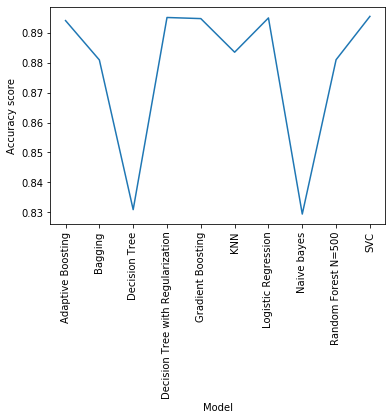

In [112]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()

# Conclusion:
## Comments on dataset:
- The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models.
- The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models.
- Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
- This situation could have been avoided if the datset was balanced.
- Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.

## Comments on Models:
- When benchmarking with 'duration' column, Support Vector Classifier achieved 90% model accuracy while naive bayes score was 85% accurate.
- SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
- After removing the 'duration' column, The highest model score dropped by 0.5%.
- The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.
- In Decision Trees, Gradient boosting method always performed better for this dataset.
- While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.

## Miscellaneous Comments:
- After trying get_dummies the score did not show significant difference as well as I have skipped the get_dummies step because the dataset was creating more dimension, which was making the project more computationally intensive.
- If I had kept get_dummies step, then in production stage if the new dataset turned out to be huge in number of rows then this project would have taken a lot of time to execute.
- Outlier handeling did not make any significant difference in the accuracy scores of models.
- I have tried to keep minimum time complexity of this project.